## **Hypothesis Testing**
Author: Joshua Kabwanaga\
Contact: info.joshua6@gmail.com

In this notebook we'll do Exploratory analysis(EDA) and A/B testing, that going to help find the hidden trend of the student performance matrix. between student gender,Ethnicgroup,And Parent education vs Mathscore, Reading score and writting score.  

### Exploratory Data Analysis (EDA)
Data Cleaning: Ensure your dataset is clean by handling missing values, correcting data types, and removing any duplicates.
* Descriptive Statistics: Calculate basic statistics like mean, median, and standard deviation for your scores.
* Visualization: Use plots to visualize the distribution of scores and relationships between variables. For example:
Histograms for score distributions.
* Box plots to compare scores across different genders, ethnic groups, and parental education levels.
* Scatter plots to explore correlations between different scores.
### A/B Testing
Hypothesis Formulation: Define your null and alternative hypotheses. For example, “There is no difference in math scores between male and female students.”
Test Selection: Choose the appropriate statistical test (e.g., t-test, ANOVA) based on your data and hypotheses.
Conduct the Test: Perform the test and interpret the results to see if there are significant differences between groups.

Import requered libreries

In [52]:
import warnings
warnings.filterwarnings('ignore')

In [53]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import scipy.stats as stats 
from scipy.stats import chi2_contingency

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm 

Load the dataset

In [54]:
data = pd.read_csv('Math_score.csv')

Dataset overview to insure that the dataset has been imported

In [55]:
data.head(5)

,Column1,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,MathScore,ReadingScore,WritingScore
0,0,female,group B,bachelor's degree,standard,none,72,72,74
1,1,female,group C,some college,standard,completed,69,90,88
2,2,female,group B,master's degree,standard,none,90,95,93
3,3,male,group A,associate's degree,free/reduced,none,47,57,44
4,4,male,group C,some college,standard,none,76,78,75


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Column1       30641 non-null  int64 
 1   Gender        30641 non-null  object
 2   EthnicGroup   30641 non-null  object
 3   ParentEduc    30641 non-null  object
 4   LunchType     30641 non-null  object
 5   TestPrep      30641 non-null  object
 6   MathScore     30641 non-null  int64 
 7   ReadingScore  30641 non-null  int64 
 8   WritingScore  30641 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 2.1+ MB


Count the data type per column

In [57]:
data.dtypes.value_counts()

object    5
int64     4
Name: count, dtype: int64

In [58]:
data.isna().sum()

Column1         0
Gender          0
EthnicGroup     0
ParentEduc      0
LunchType       0
TestPrep        0
MathScore       0
ReadingScore    0
WritingScore    0
dtype: int64

In [59]:
data.duplicated().sum()

np.int64(0)

Seeing that we don't have missing data values in the dataset and the duplicated

    Drop the Column1 

In [60]:
#delect Column1
data.drop(['Column1'], axis=1, inplace=True)

#Check statistic descriptive on the numerical columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MathScore,30641.0,66.749355,15.206049,0.0,56.0,67.0,78.0,100.0
ReadingScore,30641.0,69.624980,14.671572,10.0,60.0,70.0,80.0,100.0
WritingScore,30641.0,68.468327,15.307814,5.0,58.0,69.0,79.0,100.0


## Data exploratory analys

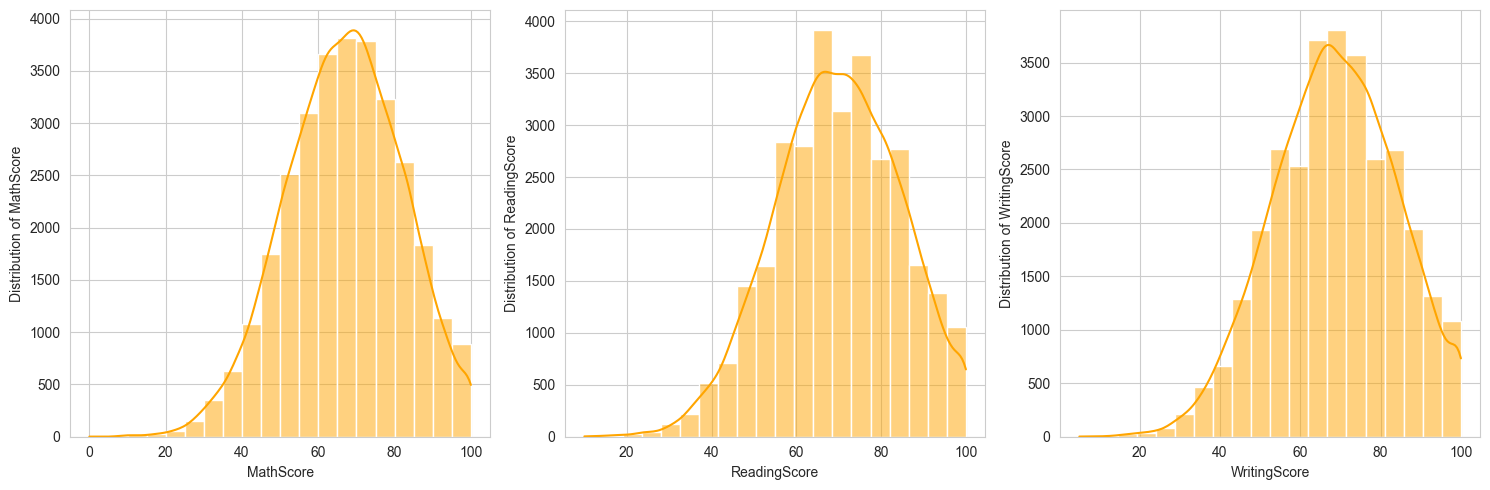

In [61]:
numerical_features = data.select_dtypes(include='number').columns.tolist()  # Example to get numberic features

sns.set_style("whitegrid")

plt.figure(figsize=(15, 5))

# Loop through numerical features
for i, column in enumerate(numerical_features, start=1):  # Use enumerate to get the index
    plt.subplot(1, 3, i)  # Adjust the number of rows and columns as needed
    sns.histplot(data[column], bins=20, kde=True, color='orange')
    plt.xlabel(column)
    plt.ylabel(f'Distribution of {column}')

plt.tight_layout()
plt.show()

Insight: As you can see the numerical column we normal distributed  and most of the result are between 40 and 100% of the students

Below we'll check the distributoion of the categorical column

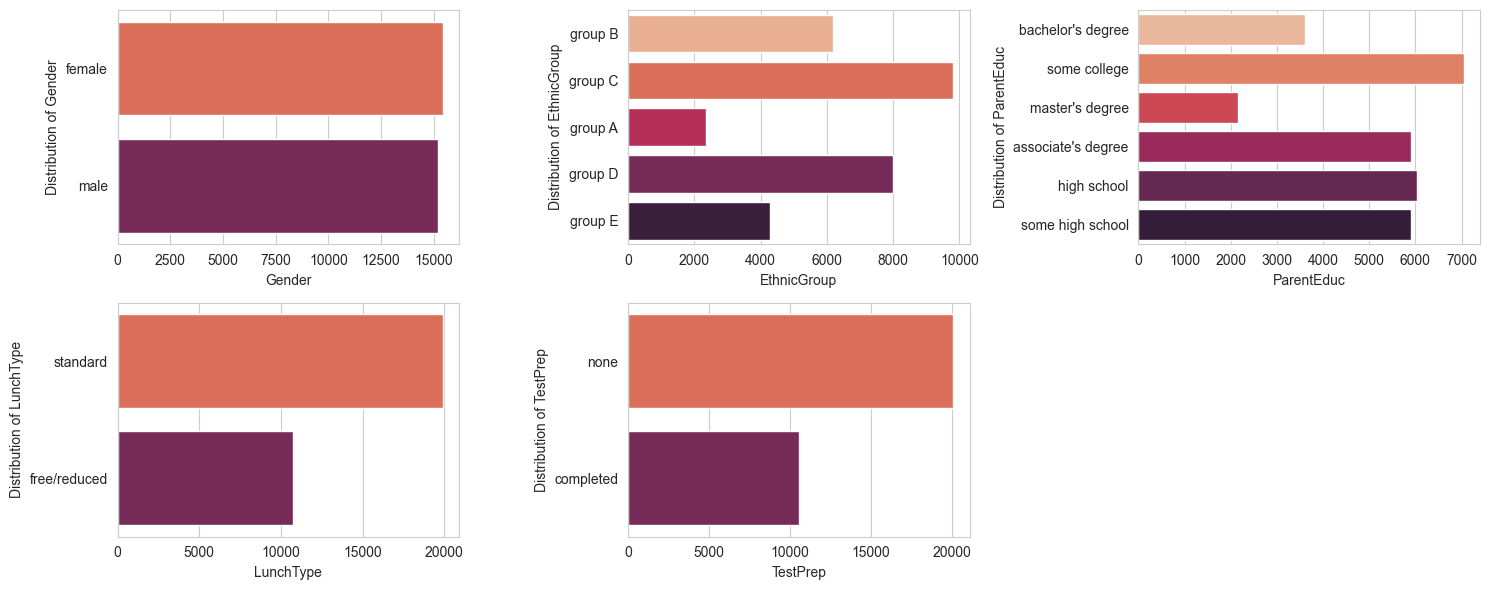

In [62]:
categorical_features = data.select_dtypes(include='object').columns.tolist()  # Example to get numberic features

sns.set_style("whitegrid")

plt.figure(figsize=(15, 6))

# Loop through numerical features
for i, column in enumerate(categorical_features, start=1):  # Use enumerate to get the index
    plt.subplot(2, 3, i)  # Adjust the number of rows and columns as needed
    sns.countplot(data[column], palette='rocket_r')
    plt.xlabel(column)
    plt.ylabel(f'Distribution of {column}')

plt.tight_layout()
plt.show()

Insight:

1. This is we see student per gend are more or less equal distributed 
2. Ethnic group C and group D the mojorities while group A are the less of all
3. Parent education distribution most parent have some college degree follow by some high education only few have Master's degree
4. Lunch type most student have standard lunch type
5. Test preparation it's so amazing that some student don't complites the test.


Let's check the average Math score per gender

In [63]:
data.groupby('Gender')[['MathScore', 'ReadingScore', 'WritingScore' ]].mean().reset_index()

,Gender,MathScore,ReadingScore,WritingScore
0,female,64.262902,73.093815,72.897692
1,male,69.269633,66.108957,63.978708


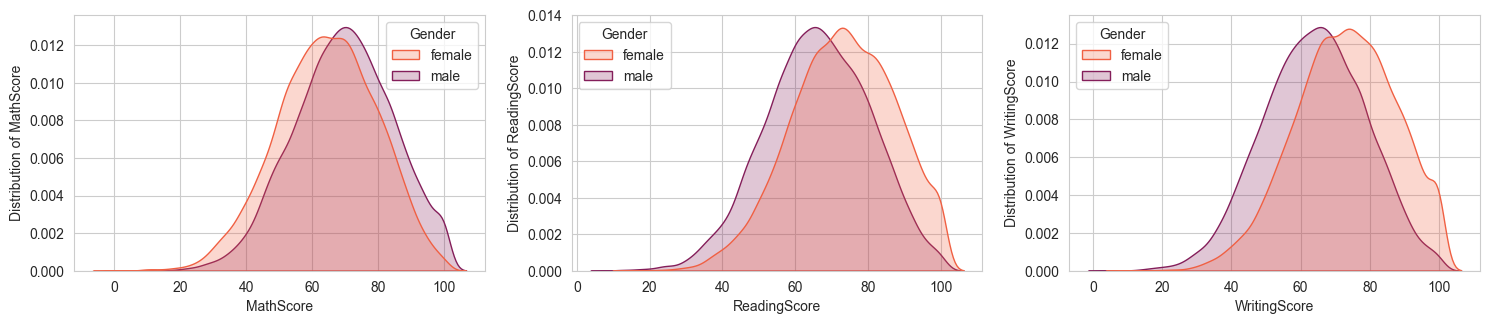

Let's check the average of the numerical column vs the student per gender


,Gender,MathScore,ReadingScore,WritingScore
0,female,64.262902,73.093815,72.897692
1,male,69.269633,66.108957,63.978708


In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming Gender_result is already defined as:
Gender_result = data[['MathScore', 'ReadingScore', 'WritingScore', 'Gender']]

sns.set_style("whitegrid")

plt.figure(figsize=(15, 6))

# Loop through numerical features
for i, column in enumerate(Gender_result.columns[:-1], start=1):  # Exclude 'Gender' from the columns
    plt.subplot(2, 3, i)  # Adjust the number of rows and columns as needed
    sns.kdeplot(data=Gender_result, x=column, hue='Gender', palette='rocket_r', fill=True)
    plt.xlabel(column)
    plt.ylabel(f'Distribution of {column}')

plt.tight_layout()
plt.show()
#Let's check the average of the numerical column vs the studet per gender
print("Let's check the average of the numerical column vs the student per gender")
df_gender = data.groupby('Gender')[['MathScore', 'ReadingScore', 'WritingScore' ]].mean().reset_index()
df_gender.style.background_gradient(axis=0,  cmap='YlOrRd')

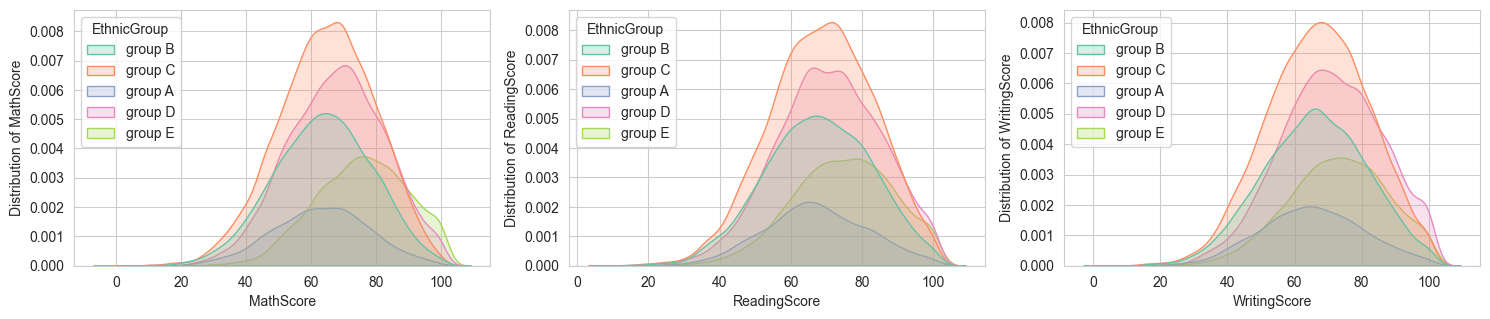

Let's check the average of the numerical column vs the student per ethnic group


,EthnicGroup,MathScore,ReadingScore,WritingScore
0,group A,63.110640,66.955914,65.224671
1,group B,63.686208,67.584625,65.982881
2,group C,64.880705,68.656377,67.028015
3,group D,67.807914,70.573378,70.838217
4,group E,75.480644,74.490672,72.725280


In [65]:
# Assuming Gender_result is already defined as:
ethnic_result = data[['MathScore', 'ReadingScore', 'WritingScore', 'EthnicGroup']]

sns.set_style("whitegrid")

plt.figure(figsize=(15, 6))

# Loop through numerical features
for i, column in enumerate(ethnic_result.columns[:-1], start=1):  # Exclude 'Gender' from the columns
    plt.subplot(2, 3, i)  # Adjust the number of rows and columns as needed
    sns.kdeplot(data=ethnic_result, x=column, hue='EthnicGroup', palette='Set2', fill=True)
    plt.xlabel(column)
    plt.ylabel(f'Distribution of {column}')

plt.tight_layout()
plt.show()
#Let's check the average of the numerical column vs the student per gender
print("Let's check the average of the numerical column vs the student per ethnic group")
df_ethnic = data.groupby('EthnicGroup')[['MathScore', 'ReadingScore', 'WritingScore' ]].mean().reset_index()
df_ethnic.style.background_gradient(axis=0,  cmap='YlOrRd')

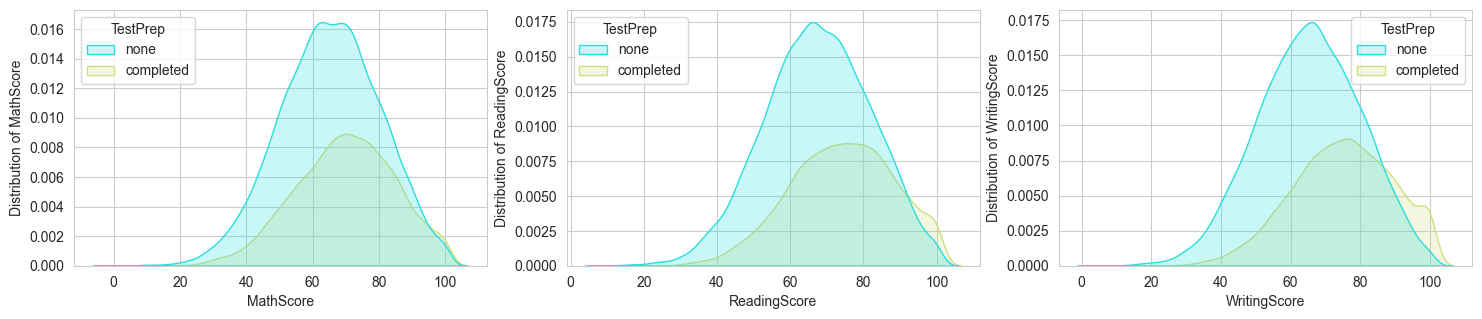

Let's check the average of the numerical column vs the student per test_preparatiom


,TestPrep,MathScore,ReadingScore,WritingScore
0,completed,69.761468,73.966235,74.735269
1,none,65.162398,67.337752,65.166534


In [66]:
# Assuming Gender_result is already defined as:
test_result = data[['MathScore', 'ReadingScore', 'WritingScore', 'TestPrep']]
#plot the data
plt.figure(figsize=(15, 6))

# Loop through numerical features
for i, column in enumerate(test_result.columns[:-1], start=1):  # Exclude 'Gender' from the columns
    plt.subplot(2, 3, i)  # Adjust the number of rows and columns as needed
    sns.kdeplot(data=test_result, x=column, hue='TestPrep', palette='rainbow', fill=True)
    plt.xlabel(column)
    plt.ylabel(f'Distribution of {column}')

plt.tight_layout()
plt.show()
#Let's check the average of the numerical column vs the student per gender
print("Let's check the average of the numerical column vs the student per test_preparatiom")
df_ethnic = data.groupby('TestPrep')[['MathScore', 'ReadingScore', 'WritingScore' ]].mean().reset_index()
df_ethnic.style.background_gradient(axis=0,  cmap='YlOrRd')

Scatter plot matrix

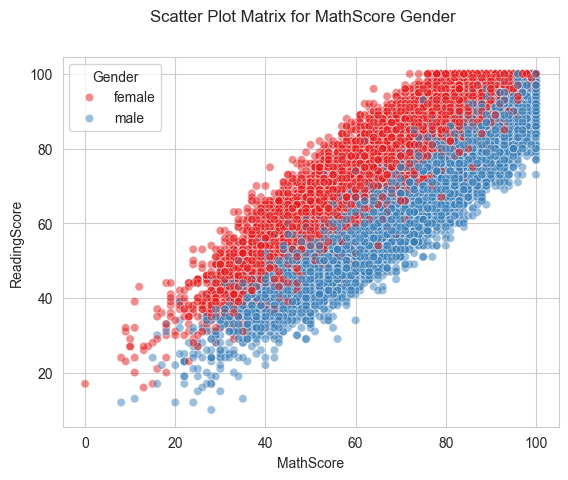

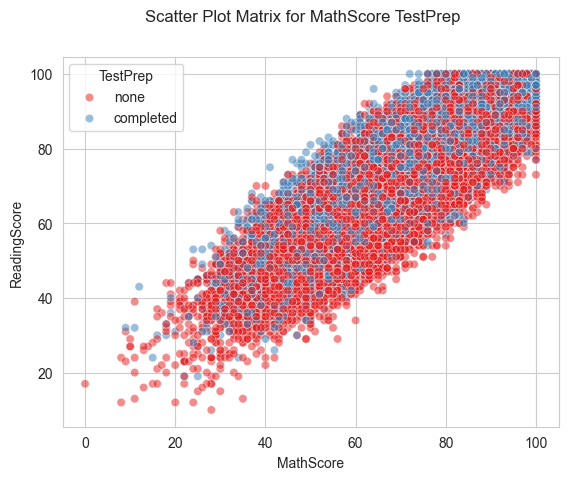

In [67]:
# scatter plot matrix for MathScore, ReadingScore, and WritingScore
sns.scatterplot(data=data, x='MathScore', y='ReadingScore',alpha=0.5, hue='Gender', palette='Set1')
plt.suptitle("Scatter Plot Matrix for MathScore Gender")
plt.show()

sns.scatterplot(data=data, x='MathScore', y='ReadingScore',alpha=0.5, hue='TestPrep', palette='Set1')
plt.suptitle("Scatter Plot Matrix for MathScore TestPrep")
plt.show()

**Insight**: The above graph display the following:
1. Math score and Reading score vs student per gender which displays that male are having more mathscore and female are having high reading score.
2. Test Preparation vs Math score and Reading score which shown that most student who complete the testprep are having high score in reading score while the studen that don't complete the testpre are having even less score. 
but we'll need more analyst to prove this suggestion.

In [68]:
data.groupby(['Gender','TestPrep'])[['MathScore', 'ReadingScore']].mean().reset_index()

,Gender,TestPrep,MathScore,ReadingScore
0,female,completed,67.167071,77.233265
1,female,none,62.714839,70.887288
2,male,completed,72.432054,70.603263
3,male,none,67.623164,63.769062


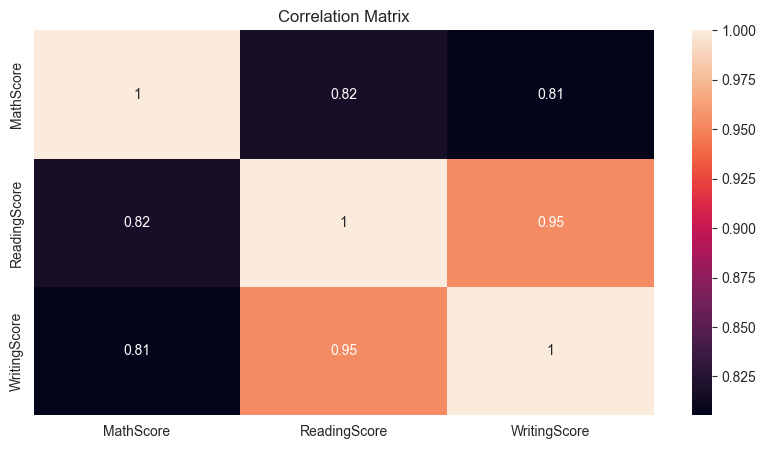

In [69]:
#select the numerical columns
num = data[['MathScore', 'ReadingScore', 'WritingScore']]

#Plot correlation matrix
plt.figure(figsize=(10,5))
df= num.corr()
sns.heatmap(df, annot=True)
plt.title("Correlation Matrix")
plt.show()

In [70]:
data['ParentEduc'].value_counts()

ParentEduc
some college          7048
high school           6031
some high school      5907
associate's degree    5902
bachelor's degree     3600
master's degree       2153
Name: count, dtype: int64

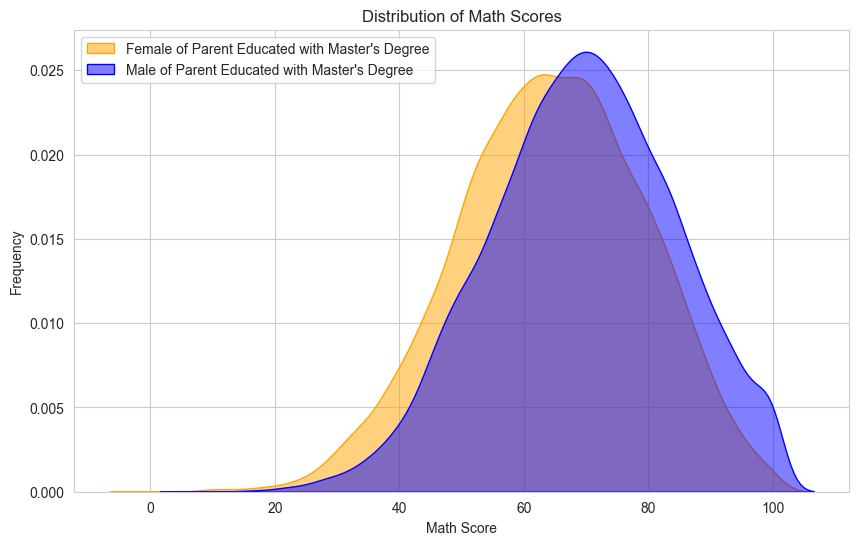

In [71]:
# Create the filtered DataFrames
df_Master = data[(data['Gender'] == "female") | (data['ParentEduc'] == "master's degree ")]
dm_Master = data[(data['Gender'] == "male") | (data['ParentEduc'] == "master's degree ")]

# Plotting histograms
plt.figure(figsize=(10, 6))
sns.kdeplot(data= df_Master, x='MathScore', fill=True, alpha=0.5, label='Female of Parent Educated with Master\'s Degree', color='orange')
sns.kdeplot(data = dm_Master, x='MathScore', fill=True, alpha=0.5, label='Male of Parent Educated with Master\'s Degree', color='blue')

# Adding titles and labels
plt.title('Distribution of Math Scores')
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# **Hypothesis Testing**

## 1. Choosing a sample


In this first example, we will show how to prove (or disprove), with statistical evidence, that the Mathscore of females is different from that of males.

The first step in hypothesis testing is to choose a sample test statistic. Hypothesis testing allows us to check the sample statistic against a statistic of another sample or population. Let  𝜇1 be the population mean for Math score of males and 𝜇2 be the the population mean for Math score of females. We will compare these mean values, :$\mu\_{1}$ and $\mu\_{2}$, statistically.


## 2. Define hypothesis (Null and Alternative)

The next step is to define the hypothesis to be tested. Hypothesis is defined in two ways - null hypothesis and alternative hypothesis. Null hypothesis is a statistical hypothesis which assumes that the difference in observations is due to a random factor. It is denoted by Ho. Alternative hypothesis is the opposite of null hypothesis. It assumes that the difference in observations is the result of a real effect. The alternate hypothesis is denoted by H1.


$ 𝐻_{0}:\mu_{1}-\mu_{2} = 0 $ There is no difference between the BMI of male and BMI of female. \
$ 𝐻_{A}:\mu_{1}-\mu_{2} != 0 $ There is difference between the BMI of male and BMI of female.

The equal sign in the null hypothesis indicates that it is a 2-tailed test.

3. ### Set a creteria

#### Normal distribution:

Normal distribution, also known as the Gaussian distribution, is a probability distribution that appears as a "bell curve" when graphed. The normal distribution describes a symmetrical plot of data around its mean value, where the width of the curve is defined by the standard deviation.
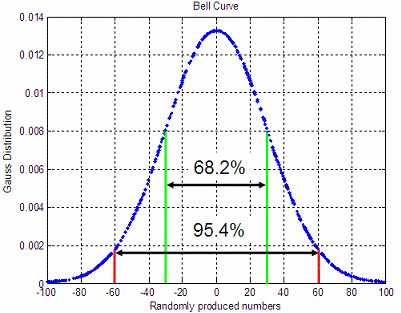

To set the criteria for a decision, we state the level of significance for a test. It could be 5%, 1% or 0.5%. Based on the level of significance, we can make a decision whether to accept the null hypothesis and reject the alternate, and vise versa.

The diagram above describes the principles of hypothesis testing. We will choose 5% significance level. Therefore, our $ \alpha=0.05 $. Since we have a 2-tailed test, we have to divide alpha by 2, which gives us 0.025. So, if the calculated p-value is less than alpha, we will reject the null hypothesis. The significance level is based on the business requirements. If you would like to learn more about the statistical significance, please visit this [wikipedia link](https://en.wikipedia.org/wiki/Statistical_significance?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01).

In this lab, we will use one of the t-test, z-score, f-score or chi-squared statistics to evaluate our results.

A t-test is used for testing the mean of one population against a standard or comparing the means of two populations if you do not know standard deviation of the the population and when you have a limited sample (n < 30). If you know the standard deviation of the populations , you may use a z-test.

A z-test is used for testing the mean of a population versus a standard, or comparing the means of two populations, with large (n ≥ 30) samples, whether you know the population standard deviation or not. It is also used for testing the proportion of some characteristic versus a standard proportion, or comparing the proportions of two populations.

An f-test is used to compare variances between 2 populations. The samples can be any size. It is the basis of ANOVA.

chi-squared test is used to determine whether there is a statistically significant difference between the expected and the observed frequencies in one or more categories of a contingency table. A contingency table is a tabular representation of categorical data. It shows the frequency distribution of the variables.

To learn more about [t-test](https://en.wikipedia.org/wiki/Student%27s_t-test?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01), [z-score](), [f-score](https://en.wikipedia.org/wiki/F-test?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) or [chi-squared](https://en.wikipedia.org/wiki/Chi-squared_test?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) statistics and [contingency tables](https://en.wikipedia.org/wiki/Contingency_table?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01), please visit their corresponding wikipedia links.


### 1.Evaluate and interpret the result


First, let's get all observations for females and males by using the `loc()` function.

In [72]:
data.columns

Index(['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
       'MathScore', 'ReadingScore', 'WritingScore'],
      dtype='object')

In [73]:
female=data.loc[data.Gender=="female"]
male=data.loc[data.Gender=="male"]

Now, let's select the Math score values for females and males.

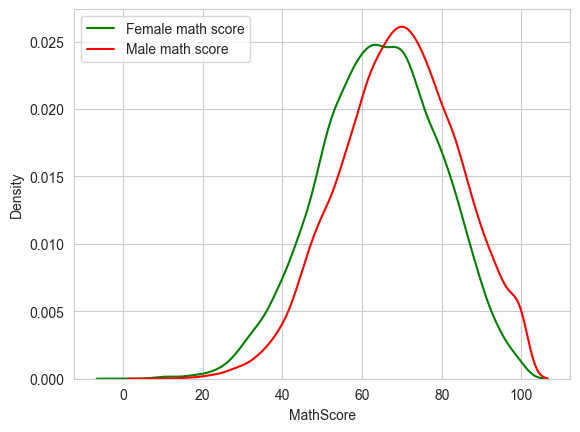

In [74]:
f_math = female.MathScore
m_math = male.MathScore

sns.distplot(f_math,color='green',hist=False, label='Female math score')
sns.distplot(m_math,color='red',hist=False, label='Male math score')
plt.legend()
plt.show()

From the graph we can already see that males are having more score that females

In [75]:
print("Female average math score",f_math.mean())
print("Male average math score",m_math.mean())

Female average math score 64.26290197095436
Male average math score 69.26963264769665


Male vs female Average math score:

1. Male are having 69%
2. Female are having 64%

Next, we will obtain our statistics, t-value and p-value. We will use `scipy.stats` library and `ttest_ind()` function to calculate these parameters.

In [76]:
alpha=0.05
t_value1, p_value1 = stats.ttest_ind(f_math, m_math)
print("t_value1 = ",t_value1, ", p_value1 = ", p_value1)

t_value1 =  -29.215194790178366 , p_value1 =  4.3175109560336834e-185


Next, although optional, it is useful to print 'if/else' statements to make our conclusions about the the hypothesis.

In [77]:
if p_value1 <alpha:
    print("Conclusion: since p_value {} is less than alpha {} ". format (p_value1,alpha))
    print("Reject the null hypothesis that there is no difference between Math score of females and Math score of males.")
    
else:
    print("Conclusion: since p_value {} is greater than alpha {} ". format (p_value1,alpha))
    print("Fail to reject the null hypothesis that there is a difference between Math score of females and Math score of males.")

Conclusion: since p_value 4.3175109560336834e-185 is less than alpha 0.05 
Reject the null hypothesis that there is no difference between Math score of females and Math score of males.


 We reject the null hypothesis and can conclude that there is a difference between the female and male Math score.

### Conclusion

If the p-value is less than or equal to the chosen significance level (α), you would reject the null hypothesis. This implies that there is statistically significant evidence to suggest that there is a difference between the math scores of females and males. In other words, you have found evidence that supports the claim that the math scores of females and males are not equal.

So, in conclusion, I can confidently state that there is a significant difference in the math scores between females and males based on the sample data.

## 2. Evaluation of reading score for male and female

In this example, we would like to prove (or disprove) that the  reading score of male student and female student are different or equal.

In [78]:
f_read = female.ReadingScore
m_read = male.ReadingScore

[Text(0.5, 1.0, 'Fig:1 Gender vs Reading Score')]

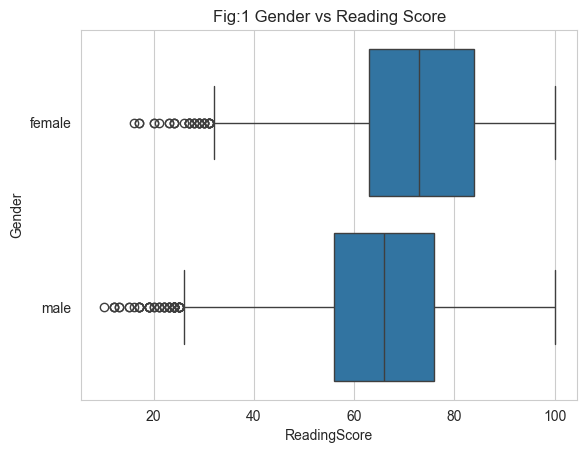

In [79]:
sns.boxplot(x=data.ReadingScore,y=data.Gender,data=data).set(title="Fig:1 Gender vs Reading Score")

In [80]:
f_read = female.ReadingScore
m_read = male.ReadingScore

print("Female average reading score",f_read.mean())
print("Male average reading score",m_read.mean())

Female average reading score 73.0938148340249
Male average reading score 66.10895708746796


In [81]:
alpha=0.05
t_val2, p_value2 = stats.ttest_ind(f_read, m_read)
p_value_onetail=p_value2/2
print("t_value = {} , p_value ={} , p_value_onetail = {}".format(t_val2, p_value2, p_value_onetail))

t_value = 42.89946401231943 , p_value =0.0 , p_value_onetail = 0.0


Use `print()` function to state your conclusions based on the calculated statistics. What are the conclusions?

In [82]:
if p_value2 <alpha :
    print("Conclusion:Since p_value {} is less than alpha {} ".format (p_value_onetail,alpha) )
    print("Reject null hypothesis that average reading score for males  are less than or equal to female.")

else:
    print("Conclusion:Since p value {} is greater than alpha {} ".format (p_value_onetail,alpha))
    print("Failed to reject null hypothesis that average reading for male are less than female.")

Conclusion:Since p_value 0.0 is less than alpha 0.05 
Reject null hypothesis that average reading score for males  are less than or equal to female.


Conclusion: We reject the null hypothesis and can conclude that there is difference between the female and male reading score.

## 3. Evaluation Ethnic group

In this example, we will determine if the proportion of Math score is significantly different across the different Ethnic group.

$ 𝐻_{0} $: math score proportions are not significantly different across the different ethnic group. \
$ 𝐻_{A} $: math score proportions are different across the different ethnic group.

In [83]:
# Assuming 'data' is your DataFrame
contingency = pd.pivot_table(data, 
                             values='MathScore', 
                             index='EthnicGroup', 
                             aggfunc='mean')  # You can change 'mean' to 'sum', 'count', etc.

print(contingency)

             MathScore
EthnicGroup           
group A      63.110640
group B      63.686208
group C      64.880705
group D      67.807914
group E      75.480644


<Axes: xlabel='EthnicGroup'>

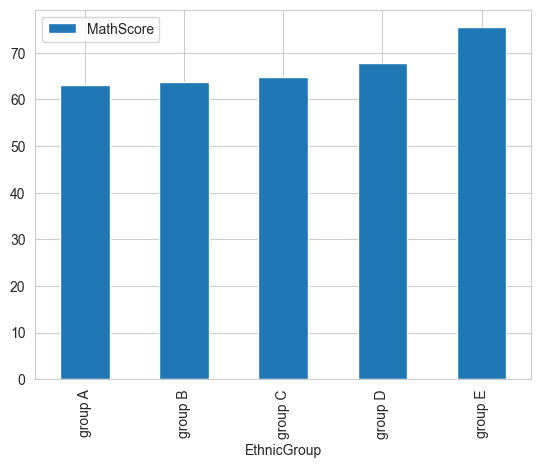

In [84]:
contingency.plot(kind='bar')

Now, using `chi2_contingency()` method, from the *scipy.stats* `chi2_contingency`, we will calculate chi-squared, p-value, degrees of freedom, and expected frequencies for our data.

In [85]:
chi2, p_val, dof, exp_freq = chi2_contingency(contingency, correction = False)
print('chi-square statistic: {} , p_value: {} , degree of freedom: {} ,expected frequencies: {} '.format(chi2, p_val, dof, exp_freq))

chi-square statistic: 0.0 , p_value: 1.0 , degree of freedom: 0 ,expected frequencies: [[63.1106401 ]
 [63.68620801]
 [64.88070497]
 [67.80791385]
 [75.48064366]] 


In [86]:
if (p_val < 0.05):
    print('Reject the null hypothesis, that the mathematic score proportions are not significantly different across the different ethinc group')
else:
    print('Accept the null hypothesis, that the mathematic score proportions are not significantly different across the different ethinc group')

Accept the null hypothesis, that the mathematic score proportions are not significantly different across the different ethinc group


Conclusion:\
 We failed to reject that the proportions of mathematic score are not significantly different across different ethnic group. Therefore, the proportions of mathematic score are different across different ethnic group.

In [87]:
# Define the two groups
group_A = data[data['TestPrep'] == 'completed']['MathScore']
group_B = data[data['TestPrep'] == 'none']['MathScore']

# Calculate the means of the two groups
mean_A = group_A.mean()
mean_B = group_B.mean()

print(f"Mean Math Score for Group A (completed test prep): {mean_A}")
print(f"Mean Math Score for Group B (no test prep): {mean_B}")

# Perform the t-test
t_stat, p_value = stats.ttest_ind(group_A, group_B)

print(f"t-statistic: {t_stat}, p-value: {p_value}")

# Set the significance level
alpha = 0.05

# Conclusion
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in Math scores between the two groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in Math scores between the two groups.")

Mean Math Score for Group A (completed test prep): 69.76146788990826
Mean Math Score for Group B (no test prep): 65.16239784731911
t-statistic: 25.4321183150142, p-value: 3.2590788213200796e-141
Reject the null hypothesis: There is a significant difference in Math scores between the two groups.


Conclusion: 

We failed to reject that the proportions of mathematic score are not significantly different across different Testprep. TThere is no significant difference in Math scores those that completed the testprep and those who don't complete

## Summary and Recommendations
In this project we did Exploratory analysis(EDA) and A/B testing statistic hypothesis metrix:
### Summary:
1. **Gender Analysis**:
    - The average Math score for males is higher than that for females.
    - The t-test results indicate a significant difference in Math scores between males and females.
    - Similarly, the average Reading score for females is higher than that for males.
    - The t-test results indicate a significant difference in Reading scores between males and females.

2. **Ethnic Group Analysis**:
    - The average Math scores vary across different ethnic groups.
    - The chi-squared test results indicate that the Math score proportions are significantly different across different ethnic groups.

3. **Test Preparation Analysis**:
    - Students who completed the test preparation have higher average Math scores compared to those who did not.
    - The t-test results indicate a significant difference in Math scores between students who completed the test preparation and those who did not.

### Recommendations:
1. **Gender-Specific Interventions**:
    - Implement targeted interventions to support female students in improving their Math scores.
    - Encourage male students to enhance their Reading skills through additional reading programs and resources.

2. **Ethnic Group Support**:
    - Provide additional resources and support to ethnic groups with lower average Math scores to bridge the performance gap.
    - Conduct further analysis to understand the underlying factors contributing to the differences in performance among ethnic groups.

3. **Test Preparation Programs**:
    - Promote and encourage participation in test preparation programs, as they have shown to significantly improve Math scores.
    - Evaluate the effectiveness of current test preparation programs and make necessary improvements to maximize their impact.

4. **Continuous Monitoring and Evaluation**:
    - Regularly monitor the performance of students across different demographics to identify areas needing improvement.
    - Conduct periodic evaluations of implemented interventions to assess their effectiveness and make data-driven adjustments.

**Note** By implementing these recommendations, educational institutions can work towards improving student performance and ensuring equitable opportunities for all students.